### EDA for ELO Merchants


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import pandas_profiling
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_columns', None)

In [3]:
#loading csv
merchants = pd.read_csv('E:/ELOData/merchants.csv')
merchants.head() 

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.400000,9.666667,3,-2.250000,18.666667,6,-2.320000,13.916667,12,N,242,9,1.000000
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.720000,1.750000,3,-0.740000,1.291667,6,-0.570000,1.687500,12,N,22,16,1.000000
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.130000,260.000000,2,-82.130000,260.000000,2,-82.130000,260.000000,2,N,-1,5,5.000000
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,nan,1.666667,3,nan,4.666667,6,nan,3.833333,12,Y,-1,-1,nan
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,nan,0.500000,3,nan,0.361111,6,nan,0.347222,12,Y,-1,-1,nan


In [15]:
pandas_profiling.ProfileReport(merchants)


* Since categorical variables are ignored from correlation , we will impute them and again check the profiling statistics
* As per the dictionery we know A>B>C>D>E. , hence imputing corresponding weighted numbers



In [4]:
def convertToNumbers(df):
    for col in ['category_1', 'category_4']:
        df[col] = df[col].map({'Y':1, 'N':0})
        
    for col in ['most_recent_purchases_range', 'most_recent_sales_range']:
        df[col] = df[col].map({'A':5, 'B':4,'C':3, 'D':2,'E':1})    
    return df

merchants = convertToNumbers(merchants)


In [ ]:
pandas_profiling.ProfileReport(merchants)

In [5]:
merchants.corr()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
merchant_group_id,1.000000,-0.015599,0.087288,-0.057871,-0.057829,0.032158,0.148538,0.113797,-0.002750,-0.002336,0.000400,-0.001727,-0.002943,-0.004524,-0.001189,-0.003484,-0.003478,0.123028,-0.091952,-0.032902,-0.000157
merchant_category_id,-0.015599,1.000000,-0.004112,-0.002459,-0.002711,-0.003885,0.044955,0.077078,0.000554,-0.000344,-0.005517,0.001036,0.000190,-0.009388,0.000800,0.000729,-0.018072,-0.017626,-0.004951,0.009357,0.020914
subsector_id,0.087288,-0.004112,1.000000,0.004493,0.005594,-0.050067,-0.031244,0.157683,-0.000941,0.000038,0.007864,-0.001508,0.000758,-0.002241,-0.001766,0.001464,-0.015790,0.048713,-0.015259,0.015125,-0.019570
numerical_1,-0.057871,-0.002459,0.004493,1.000000,0.998749,-0.002815,0.166899,0.161665,-0.000334,-0.000289,0.003837,-0.000326,-0.000476,0.008177,-0.000288,-0.000642,0.016001,0.008670,-0.009856,-0.000882,-0.005443
numerical_2,-0.057829,-0.002711,0.005594,0.998749,1.000000,-0.002630,0.164273,0.159726,-0.000326,-0.000281,0.003760,-0.000318,-0.000466,0.008038,-0.000281,-0.000630,0.015758,0.007627,-0.009436,-0.001072,-0.005634
category_1,0.032158,-0.003885,-0.050067,-0.002815,-0.002630,1.000000,0.057434,-0.031530,-0.000413,0.000124,-0.012576,-0.000417,0.000968,-0.017859,-0.000391,0.001604,-0.019338,0.230949,-0.142228,-0.305175,nan
most_recent_sales_range,0.148538,0.044955,-0.031244,0.166899,0.164273,0.057434,1.000000,0.724153,-0.004354,-0.004301,0.024294,-0.004250,-0.006973,0.049007,-0.003746,-0.009348,0.097149,0.087152,-0.005586,-0.038600,0.007398
most_recent_purchases_range,0.113797,0.077078,0.157683,0.161665,0.159726,-0.031530,0.724153,1.000000,-0.004389,-0.004328,0.028271,-0.004285,-0.007105,0.049882,-0.003777,-0.009507,0.095762,0.069839,0.023396,-0.010594,-0.032204
avg_sales_lag3,-0.002750,0.000554,-0.000941,-0.000334,-0.000326,-0.000413,-0.004354,-0.004389,1.000000,0.616581,0.000295,0.818022,0.615270,-0.001523,0.634283,0.612145,-0.005169,-0.000317,-0.001290,-0.000140,-0.002339
avg_purchases_lag3,-0.002336,-0.000344,0.000038,-0.000289,-0.000281,0.000124,-0.004301,-0.004328,0.616581,1.000000,-0.000197,0.339470,0.996669,-0.001472,0.228504,0.989830,-0.006785,0.002938,-0.000745,-0.001008,-0.001466


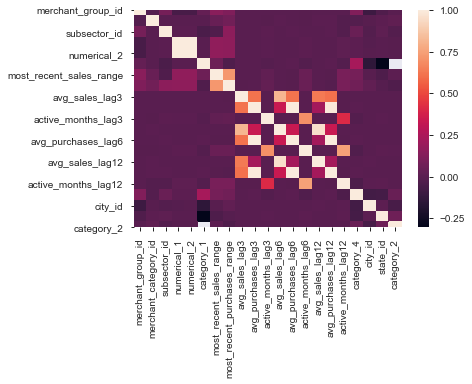

In [6]:
sns.heatmap(merchants.corr())

## Looking at the profiling report and the correlation matrix here is what our next steps are : 


### There are missing values as NaNs , we try to impute them as below:

* 'avg_sales_lag3', 'avg_sales_lag6', 'avg_sales_lag12' , we observe that the median values are much suitable than the mean value, hence we use mean to impute the missing value.
* for category_2 we see that most of the observations fall in the category value 1 , hence we use that as our imputed value such that the distribution is not hampered.
    
### Few columns have infinity as values , we try to replace the infinty values with first NaN and then impute them with correspoding median values :

* avg_purchases_lag3,avg_purchases_lag6,avg_purchases_lag12 had infinity values which we replace by median.
* overall we use median instead of mean values is because we find that the distribution for those fields are skewed and hence median is a better representation of what is missing.

### We remove the highly correlated columns :

* avg_purchases_lag12 is highly correlated with avg_purchases_lag6 (ρ = 0.99755) 
* avg_purchases_lag6 is highly correlated with avg_purchases_lag3 (ρ = 0.99667) 
* avg_sales_lag12 is highly correlated with avg_sales_lag6 (ρ = 0.95842) 
* numerical_2 is highly correlated with numerical_1 (ρ = 0.99875) 
* hence we remove avg_purchases_lag6,avg_sales_lag12 and numerical_1

In [7]:
features = [c for c in merchants.columns if c not in ['merchant_id']]

In [8]:
merchants.columns[merchants.isna().any()].tolist()

['avg_sales_lag3', 'avg_sales_lag6', 'avg_sales_lag12', 'category_2']

In [10]:
merchants.fillna({x:1.0 for x in ['category_2']}, inplace=True)

In [11]:
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,0,1,1,-0.400000,9.666667,3,-2.250000,18.666667,6,-2.320000,13.916667,12,0,242,9,1.000000
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,0,1,1,-0.720000,1.750000,3,-0.740000,1.291667,6,-0.570000,1.687500,12,0,22,16,1.000000
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,0,1,1,-82.130000,260.000000,2,-82.130000,260.000000,2,-82.130000,260.000000,2,0,-1,5,5.000000
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,1,1,1,nan,1.666667,3,nan,4.666667,6,nan,3.833333,12,1,-1,-1,1.000000
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,1,1,1,nan,0.500000,3,nan,0.361111,6,nan,0.347222,12,1,-1,-1,1.000000


In [12]:
#merchants.fillna({x:1.0 for x in ['avg_sales_lag3','avg_sales_lag6','avg_sales_lag12']}, inplace=True)
#merchants.apply(lambda x: x.fillna(x.median()),axis=0)
merchants['avg_sales_lag3'].fillna((merchants['avg_sales_lag3'].median()), inplace=True)
merchants['avg_sales_lag6'].fillna((merchants['avg_sales_lag6'].median()), inplace=True)
merchants['avg_sales_lag12'].fillna((merchants['avg_sales_lag12'].median()), inplace=True)

In [13]:
print(merchants['avg_purchases_lag3'].min())
print(merchants['avg_purchases_lag3'].max())
print(merchants['avg_purchases_lag6'].min())
print(merchants['avg_purchases_lag6'].max())
print(merchants['avg_purchases_lag12'].min())
print(merchants['avg_purchases_lag12'].max())

0.33349533
inf
0.16704466
inf
0.09832954
inf


In [14]:
merchants[merchants==np.inf]=np.nan

In [15]:
merchants.columns[merchants.isna().any()].tolist()

['avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12']

In [16]:
print(merchants['avg_purchases_lag3'].mean())
print(merchants['avg_purchases_lag3'].median())
print(merchants['avg_purchases_lag6'].mean())
print(merchants['avg_purchases_lag6'].median())
print(merchants['avg_purchases_lag12'].mean())
print(merchants['avg_purchases_lag12'].median())

1.5907620965243745
1.01666667
1.8875678157761644
1.02696078
2.0791954108498123
1.04336043


In [17]:
merchants['avg_purchases_lag3'].fillna((merchants['avg_purchases_lag3'].median()), inplace=True)
merchants['avg_purchases_lag6'].fillna((merchants['avg_purchases_lag6'].median()), inplace=True)
merchants['avg_purchases_lag12'].fillna((merchants['avg_purchases_lag12'].median()), inplace=True)

### Test if all values imputed

In [18]:
merchants.columns[merchants.isna().any()].tolist()

[]

In [19]:
features = [c for c in merchants.columns if c not in ['merchant_id']]

In [19]:
len(features)

21

In [21]:
merchants.corr()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
merchant_group_id,1.000000,-0.015599,0.087288,-0.057871,-0.057829,0.032158,0.148538,0.113797,-0.002750,-0.002336,0.000400,-0.001727,-0.002943,-0.004524,-0.001189,-0.003484,-0.003478,0.123028,-0.091952,-0.032902,-0.004882
merchant_category_id,-0.015599,1.000000,-0.004112,-0.002459,-0.002711,-0.003885,0.044955,0.077078,0.000554,-0.000344,-0.005517,0.001036,0.000190,-0.009388,0.000800,0.000729,-0.018072,-0.017626,-0.004951,0.009357,0.020709
subsector_id,0.087288,-0.004112,1.000000,0.004493,0.005594,-0.050067,-0.031244,0.157683,-0.000941,0.000038,0.007864,-0.001508,0.000758,-0.002241,-0.001766,0.001464,-0.015790,0.048713,-0.015259,0.015125,-0.011956
numerical_1,-0.057871,-0.002459,0.004493,1.000000,0.998749,-0.002815,0.166899,0.161665,-0.000334,-0.000289,0.003837,-0.000326,-0.000476,0.008177,-0.000288,-0.000642,0.016001,0.008670,-0.009856,-0.000882,-0.004888
numerical_2,-0.057829,-0.002711,0.005594,0.998749,1.000000,-0.002630,0.164273,0.159726,-0.000326,-0.000281,0.003760,-0.000318,-0.000466,0.008038,-0.000281,-0.000630,0.015758,0.007627,-0.009436,-0.001072,-0.005089
category_1,0.032158,-0.003885,-0.050067,-0.002815,-0.002630,1.000000,0.057434,-0.031530,-0.000414,0.000124,-0.012576,-0.000417,0.000968,-0.017859,-0.000391,0.001604,-0.019338,0.230949,-0.142228,-0.305175,-0.125394
most_recent_sales_range,0.148538,0.044955,-0.031244,0.166899,0.164273,0.057434,1.000000,0.724153,-0.004354,-0.004301,0.024294,-0.004250,-0.006973,0.049007,-0.003746,-0.009347,0.097149,0.087152,-0.005586,-0.038600,-0.001120
most_recent_purchases_range,0.113797,0.077078,0.157683,0.161665,0.159726,-0.031530,0.724153,1.000000,-0.004388,-0.004328,0.028271,-0.004285,-0.007105,0.049882,-0.003776,-0.009507,0.095762,0.069839,0.023396,-0.010594,-0.027080
avg_sales_lag3,-0.002750,0.000554,-0.000941,-0.000334,-0.000326,-0.000414,-0.004354,-0.004388,1.000000,0.616486,0.000296,0.818022,0.614135,-0.001522,0.634283,0.608928,-0.005168,-0.000318,-0.001290,-0.000140,-0.002188
avg_purchases_lag3,-0.002336,-0.000344,0.000038,-0.000289,-0.000281,0.000124,-0.004301,-0.004328,0.616486,1.000000,-0.000197,0.339418,0.996669,-0.001472,0.228468,0.989830,-0.006785,0.002938,-0.000745,-0.001008,-0.001422


## Dropping columns with high correlation :

In [22]:
merchants.drop(['avg_purchases_lag6','avg_sales_lag12','numerical_1'], axis=1,inplace=True)
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,active_months_lag6,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,0,1,1,-0.400000,9.666667,3,-2.250000,6,13.916667,12,0,242,9,1.000000
1,M_ID_9339d880ad,3184,840,20,-0.057471,0,1,1,-0.720000,1.750000,3,-0.740000,6,1.687500,12,0,22,16,1.000000
2,M_ID_e726bbae1e,447,690,1,-0.057471,0,1,1,-82.130000,260.000000,2,-82.130000,2,260.000000,2,0,-1,5,5.000000
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,1,1,1,1.000000,1.666667,3,1.010000,6,3.833333,12,1,-1,-1,1.000000
4,M_ID_64456c37ce,2228,222,21,-0.057471,1,1,1,1.000000,0.500000,3,1.010000,6,0.347222,12,1,-1,-1,1.000000


### Looking at the distribution of the remaining variables . Checking their distribution as well as their correlation with other variables visually using pairplots
*

In [37]:
m2 = merchants.head(100)

In [43]:
%time m2.head()

Wall time: 0 ns


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,active_months_lag6,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,0,1,1,-0.400000,9.666667,3,-2.250000,6,13.916667,12,0,242,9,1.000000
1,M_ID_9339d880ad,3184,840,20,-0.057471,0,1,1,-0.720000,1.750000,3,-0.740000,6,1.687500,12,0,22,16,1.000000
2,M_ID_e726bbae1e,447,690,1,-0.057471,0,1,1,-82.130000,260.000000,2,-82.130000,2,260.000000,2,0,-1,5,5.000000
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,1,1,1,1.000000,1.666667,3,1.010000,6,3.833333,12,1,-1,-1,1.000000
4,M_ID_64456c37ce,2228,222,21,-0.057471,1,1,1,1.000000,0.500000,3,1.010000,6,0.347222,12,1,-1,-1,1.000000


Wall time: 5min 40s


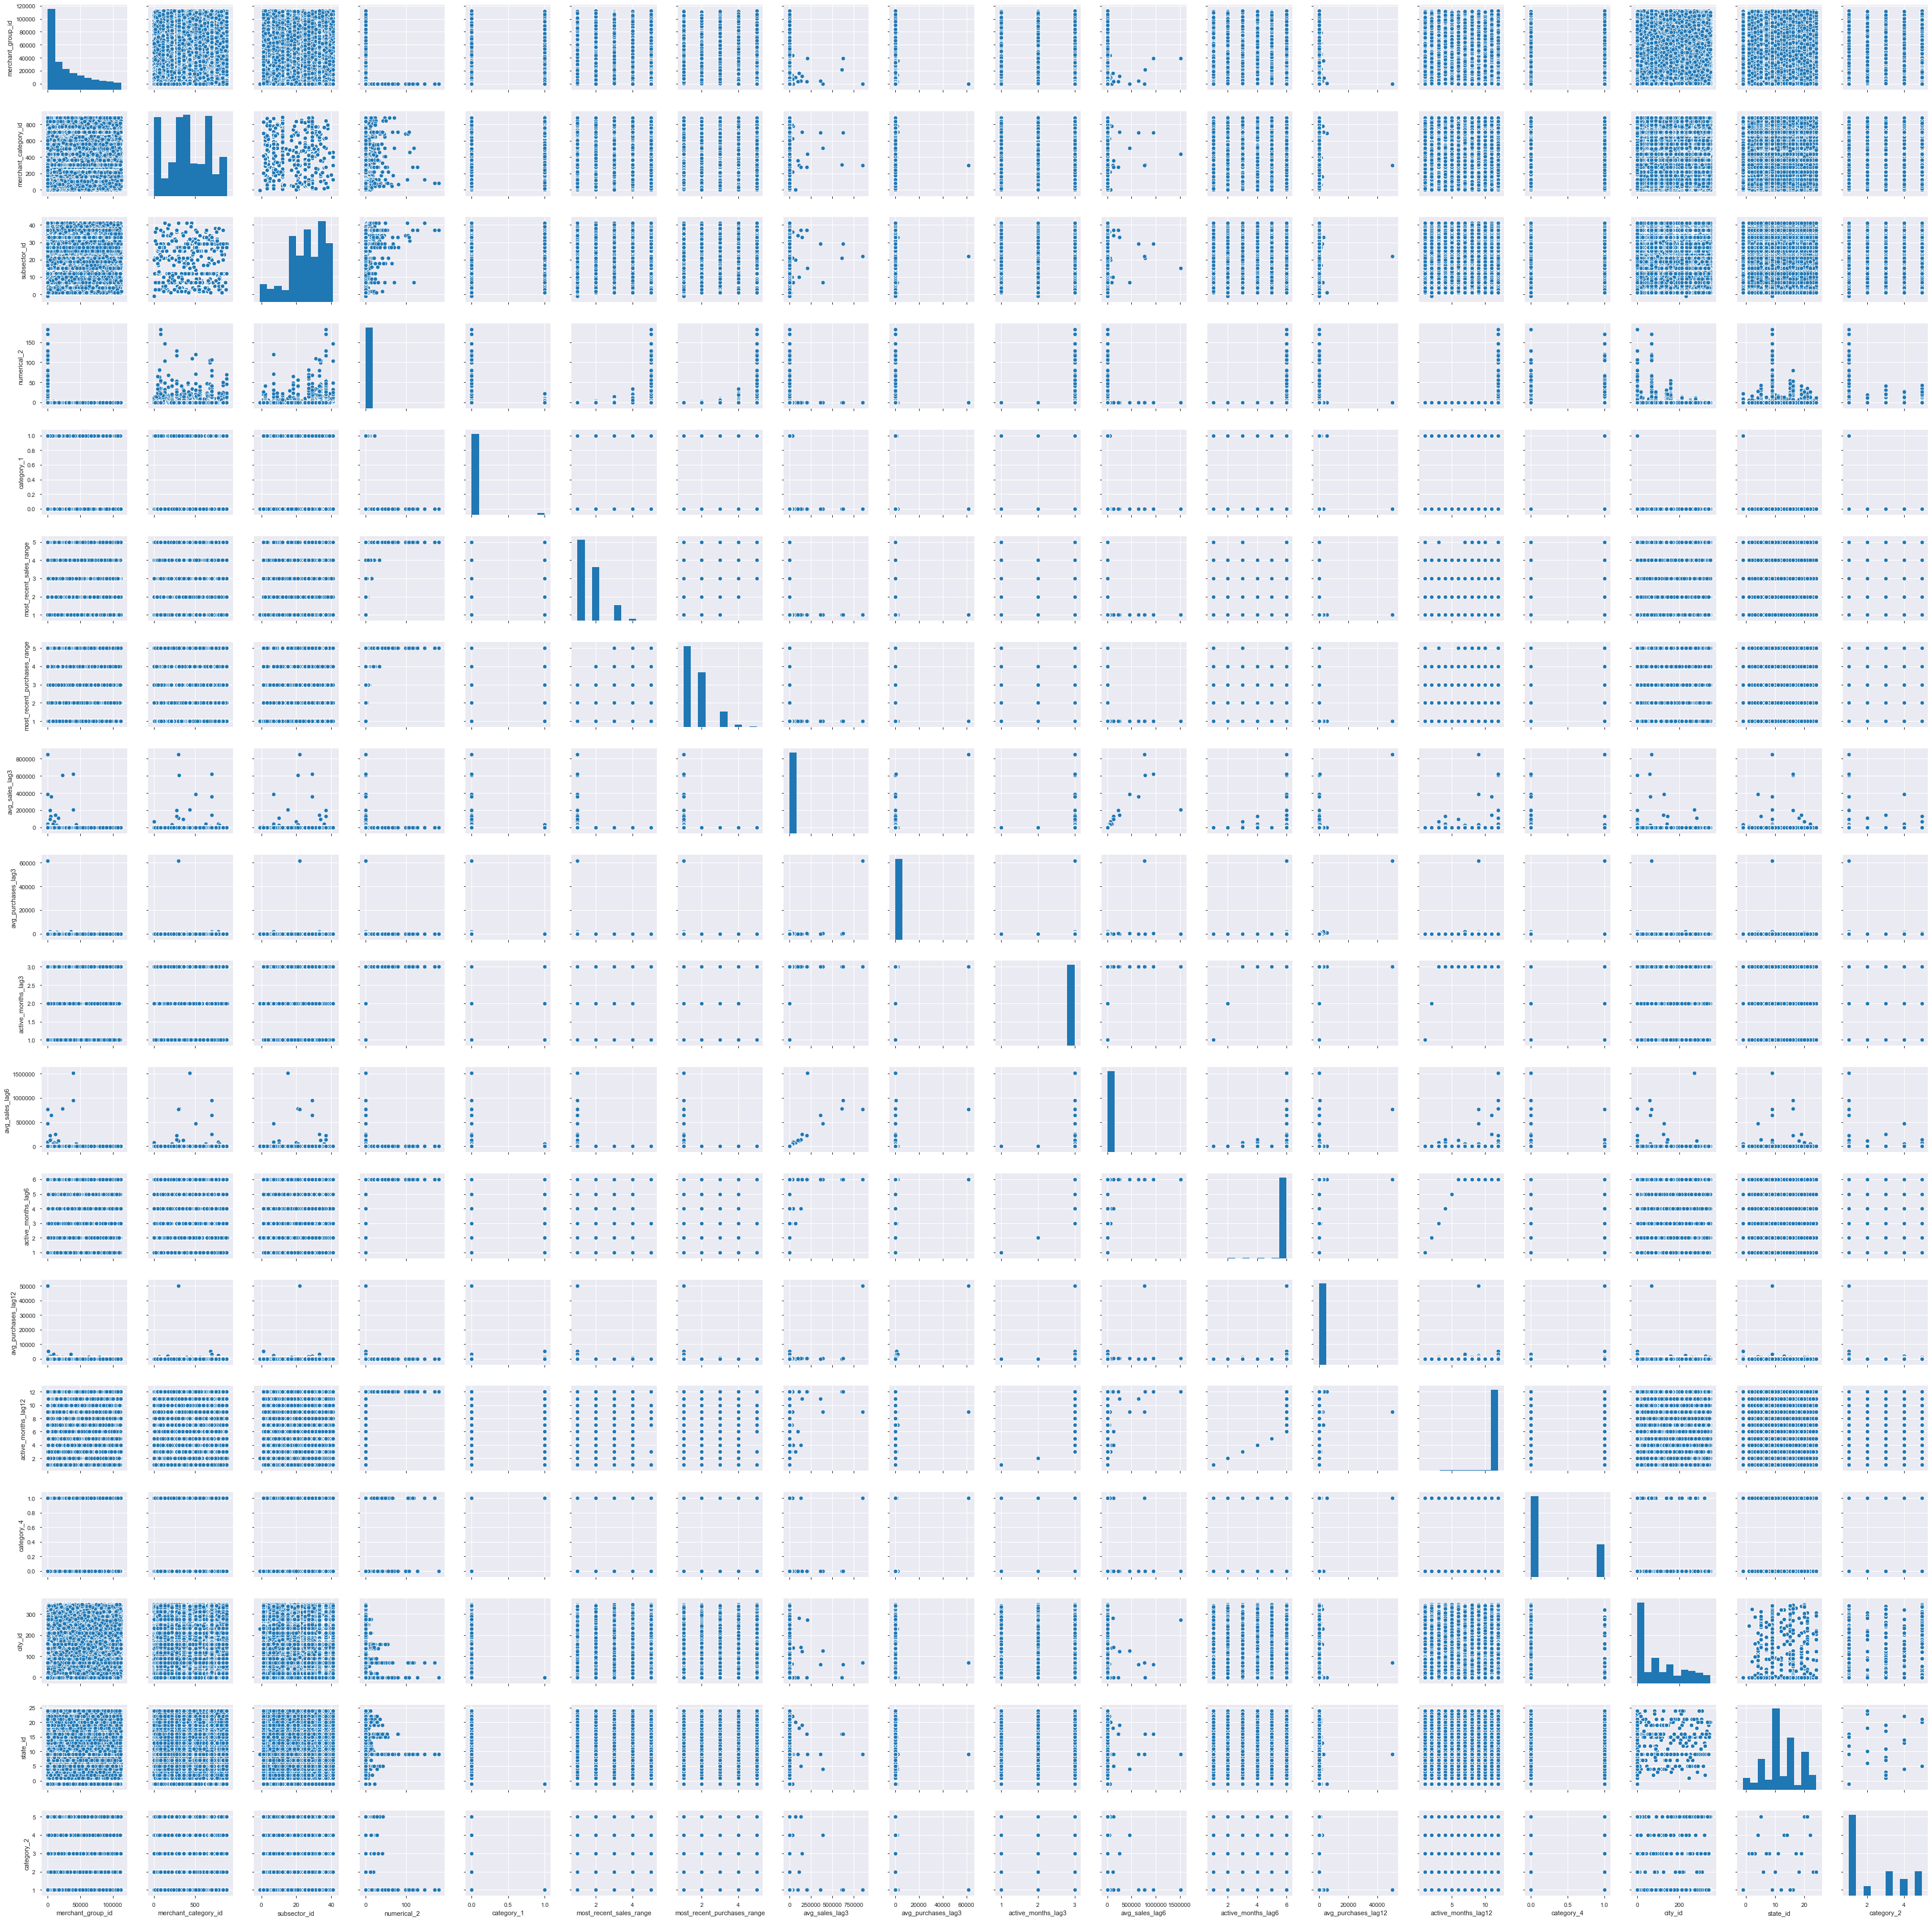

In [44]:
%time sns.pairplot(merchants)

In [25]:
#This block considers all variables and can be used iteratively to minimize re-running code
#We can limit the variables of interest if we want to
def Plot(varname,dataset):   
    f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,4))
    
    ax1.set_title('Before Log for var:' + varname)
    ax2.set_title('After Log for var:' + varname)
    ax3.set_title('After Sqrt for var:' + varname) 
    
    sns.distplot(dataset[varname].fillna(0),ax=ax1,fit=norm)   
    sns.distplot((np.log(dataset[varname]).fillna(0)),ax=ax2,fit=norm)
    sns.distplot((np.sqrt(dataset[varname]).fillna(0)),ax=ax3,fit=norm)    
    #f.savefig(varname+".png")
    plt.show()
   

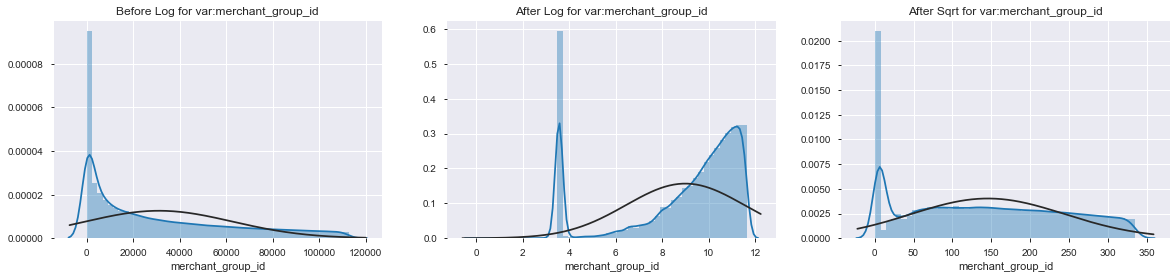

In [26]:
Plot('merchant_group_id',merchants)

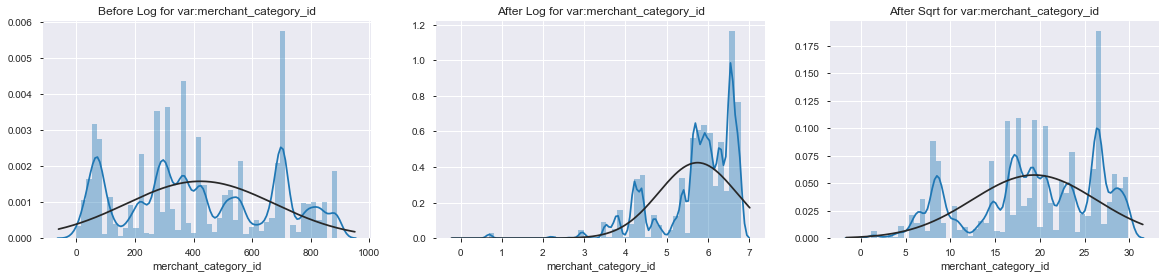

In [27]:
Plot('merchant_category_id',merchants)

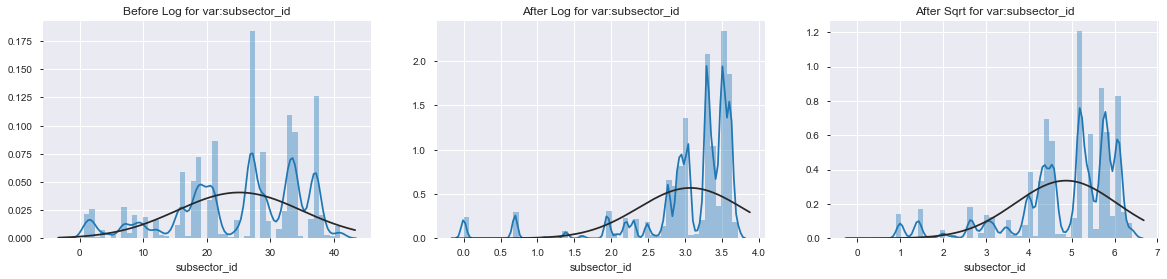

In [28]:
Plot('subsector_id',merchants)

In [29]:
merchantcnts = merchants.sort_values('merchant_id').groupby('merchant_id').size().reset_index()

In [30]:
merchants[merchants['merchant_id'].isin(merchantcnts[merchantcnts[0]>1]['merchant_id'].values)].sort_values('merchant_id',ascending=False).head(10)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,active_months_lag6,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
83151,M_ID_fea38c640b,35,884,27,-0.057471,0,1,1,0.470000,0.666667,3,0.470000,3,0.666667,3,0,156,7,3.000000
83152,M_ID_fea38c640b,35,884,27,0.616743,0,3,3,0.840000,0.841643,3,0.840000,6,0.889253,12,0,156,7,3.000000
4181,M_ID_ef233cff26,35,560,34,-0.057471,0,1,1,322.440000,76.555556,3,817.530000,6,149.592593,9,1,69,9,1.000000
4182,M_ID_ef233cff26,28799,560,34,-0.057471,0,1,1,322.440000,76.555556,3,817.530000,6,149.592593,9,1,69,9,1.000000
4183,M_ID_ef233cff26,28799,560,34,-0.057471,0,2,2,4.740000,4.077922,3,4.980000,6,3.509740,8,1,69,9,1.000000
4184,M_ID_ef233cff26,35,560,34,-0.057471,0,2,2,4.740000,4.077922,3,4.980000,6,3.509740,8,1,69,9,1.000000
166812,M_ID_ebbdb42da6,1014,383,2,-0.007896,1,1,1,0.900000,1.196078,3,1.410000,6,1.801471,12,1,-1,-1,1.000000
166813,M_ID_ebbdb42da6,35,383,2,-0.007896,1,1,1,0.900000,1.196078,3,1.410000,6,1.801471,12,1,-1,-1,1.000000
166814,M_ID_ebbdb42da6,1014,383,2,-0.057471,1,5,5,0.950000,0.967848,3,0.860000,6,0.798322,12,1,-1,-1,1.000000
166815,M_ID_ebbdb42da6,35,383,2,-0.057471,1,5,5,0.950000,0.967848,3,0.860000,6,0.798322,12,1,-1,-1,1.000000


In [31]:
merchants[merchants['merchant_id'].isin(['M_ID_ebbdb42da6'])]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,active_months_lag6,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
166812,M_ID_ebbdb42da6,1014,383,2,-0.007896,1,1,1,0.900000,1.196078,3,1.410000,6,1.801471,12,1,-1,-1,1.000000
166813,M_ID_ebbdb42da6,35,383,2,-0.007896,1,1,1,0.900000,1.196078,3,1.410000,6,1.801471,12,1,-1,-1,1.000000
166814,M_ID_ebbdb42da6,1014,383,2,-0.057471,1,5,5,0.950000,0.967848,3,0.860000,6,0.798322,12,1,-1,-1,1.000000
166815,M_ID_ebbdb42da6,35,383,2,-0.057471,1,5,5,0.950000,0.967848,3,0.860000,6,0.798322,12,1,-1,-1,1.000000


In [ ]:
#from above example we still need to come down to two rows for this merchant , - need to discuss, once that is done , 
#our joins with hist file should be on merchant_id , merchant_group_id , merchant_catergory_id

In [32]:
final_deduped= merchants.drop_duplicates(['merchant_id','merchant_category_id','subsector_id'])


In [33]:
final_deduped[final_deduped['merchant_id'].isin(['M_ID_ebbdb42da6'])]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,active_months_lag6,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
166812,M_ID_ebbdb42da6,1014,383,2,-0.007896,1,1,1,0.900000,1.196078,3,1.410000,6,1.801471,12,1,-1,-1,1.000000


In [34]:
final_deduped.to_csv('E:/ELOData/merchants_transformed.csv', index = False, header = True)

In [35]:
final_deduped.shape


(334634, 19)

In [36]:
final_deduped.nunique()

merchant_id                    334633
merchant_group_id              109389
merchant_category_id              324
subsector_id                       41
numerical_2                       941
category_1                          2
most_recent_sales_range             5
most_recent_purchases_range         5
avg_sales_lag3                   3372
avg_purchases_lag3              99973
active_months_lag3                  3
avg_sales_lag6                   4507
active_months_lag6                  6
avg_purchases_lag12            172880
active_months_lag12                12
category_4                          2
city_id                           271
state_id                           25
category_2                          5
dtype: int64